# Bias-Variance Tradeoff


In supervised learning, the total prediction error can be decomposed into three components:

$
\text{Expected Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$

Understanding how bias and variance behave is essential for model selection, tuning, and improving generalization.


- **Bias**: Error from incorrect assumptions in the model (e.g., linear model for nonlinear data).
- **Variance**: Error from model sensitivity to small fluctuations in the training set.
- **Irreducible Error**: Noise in data we cannot remove.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Ground truth: y = sin(2πx)
def true_function(x):
    return np.sin(2*np.pi*x)

# Generate synthetic data
np.random.seed(42)
n_samples = 30
x = np.sort(np.random.randn(n_samples))
y = true_function(x) + np.random.normal(0, 0.3, size=x.shape)

# generating test data
x_test = np.linspace(0,1,1000)
y_test = true_function(x_test)

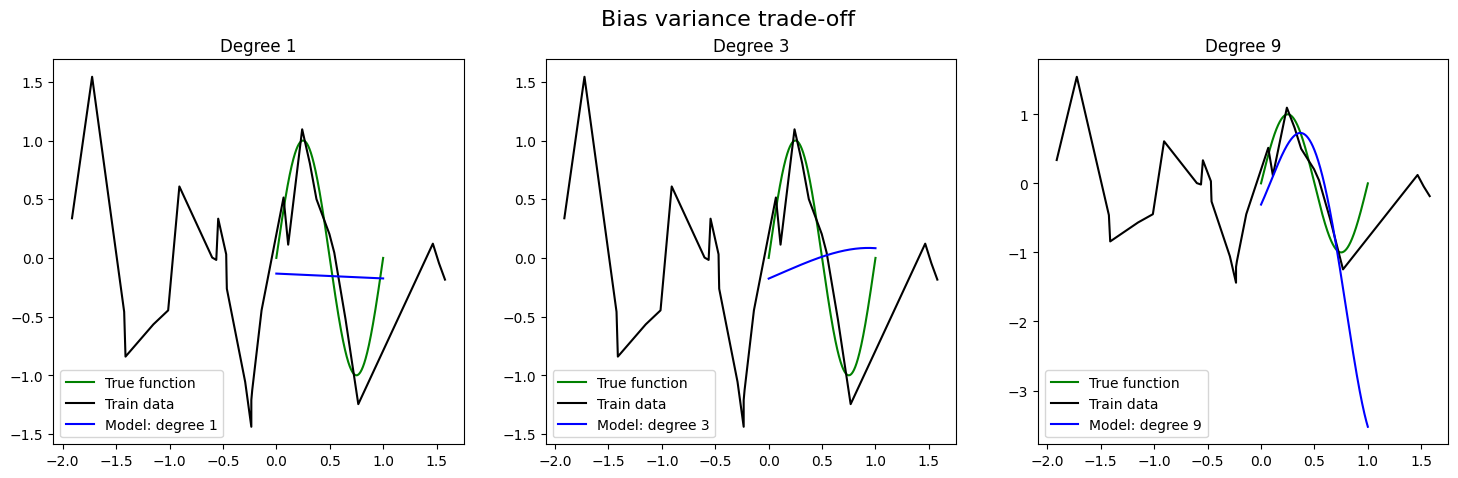

In [7]:
degrees = [1,3,9]
plt.figure(figsize=(18,5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    y_pred = model.predict(x_test[:, np.newaxis])

    plt.subplot(1, 3, i+1)
    plt.plot(x_test, y_test, label="True function", color="green")
    plt.plot(x, y, label="Train data", color="black")
    plt.plot(x_test, y_pred, label=f"Model: degree {degree}", color="blue")
    plt.title(f"Degree {degree}")
    plt.legend()

plt.suptitle("Bias variance trade-off", fontsize=16)
plt.show()

Running many training sets, and observing average predictions and spread

In [14]:
from sklearn.utils import resample

def compute_bias_variance(degree, n_runs=100):
    y_preds = []

    for _ in range(n_runs):
        x_boot = np.sort(np.random.rand(n_samples))
        y_boot = true_function(x_boot) + np.random.normal(0, 0.3, size=x_boot.shape)

        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_boot[:, np.newaxis], y_boot)
        y_pred = model.predict(x_test[:, np.newaxis])
        y_preds.append(y_pred)

    y_preds = np.array(y_preds)
    bias_squared = np.mean((np.mean(y_preds, axis=0) - y_test) ** 2)
    variance = np.mean(np.var(y_preds, axis=0))
    return bias_squared, variance

for deg in [1, 3, 9]:
    bias2, var = compute_bias_variance(deg)
    print(f"Degree {deg}: Bias^2 = {bias2:.3f}, Variance = {var:.3f}, Total = {bias2 + var:.3f}")


Degree 1: Bias^2 = 0.197, Variance = 0.026, Total = 0.223
Degree 3: Bias^2 = 0.005, Variance = 0.016, Total = 0.021
Degree 9: Bias^2 = 0.068, Variance = 2.420, Total = 2.488


- **Low-degree models (e.g., degree=1)** have high bias (underfitting), but low variance.
- **High-degree models (e.g., degree=9)** have low bias but high variance (overfitting).
- The sweet spot is a **medium complexity model** that balances both.


> "Bias and variance are two sides of the same coin. To reduce total error, we must find the right balance, not eliminate one entirely."
